In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image

### Loading the model

In [ ]:
# Load the trained COVID X-ray classification model
model = load_model('covid_xray_model.keras')

2024-07-08 23:34:12.037898: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-08 23:34:12.037917: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-08 23:34:12.037935: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-08 23:34:12.037955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-08 23:34:12.037973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
# Load test dataset for model evaluation and visualization
# Images resized to 224x224 to match model input requirements
test_data = tf.keras.utils.image_dataset_from_directory(
    'COVID-QU-Ex Dataset/Lung Segmentation Data/Lung Segmentation Data/Test',
    shuffle=True,
    image_size=(224, 224),
    batch_size=32
)


Found 6788 files belonging to 3 classes.


In [4]:
# Get class names for labeling predictions
class_names = test_data.class_names
class_names

['COVID-19', 'Non-COVID', 'Normal']

### Model confusion matrix

In [ ]:
# Generate predictions for entire test dataset to create confusion matrix
true_labels = []
predicted_labels = []

for images, labels in test_data:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


2024-07-08 23:34:13.650422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

2024-07-08 23:34:24.223121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 1000x1000 with 0 Axes>

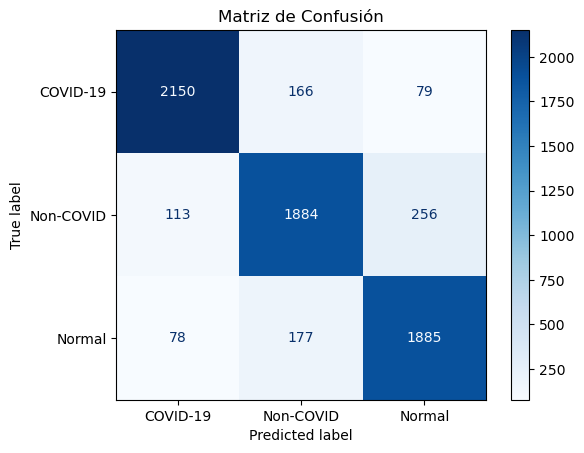

In [ ]:
# Create and display confusion matrix to analyze per-class performance
cm = confusion_matrix(true_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=test_data.class_names)

plt.figure(figsize=(10, 10))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

**Confusion Matrix Analysis:**

**Per-class Performance:**
- **COVID-19**: 89.8% accuracy (2150/2395) - Excellent detection rate with minimal false negatives
- **Non-COVID**: 83.6% accuracy (1884/2253) - Lowest performance, indicating diagnostic challenge
- **Normal**: 88.1% accuracy (1885/2140) - Strong performance for healthy cases

**Key Observations:**
- **Strongest performance**: COVID-19 detection with only 10.2% misclassification rate
- **Main challenge**: Non-COVID cases frequently misclassified as Normal (256 cases), suggesting difficulty distinguishing other lung conditions from healthy tissue
- **Clinical significance**: The model's high sensitivity for COVID-19 (89.8%) makes it suitable for screening, but specificity issues with non-COVID conditions require attention

**Error Pattern Analysis:**
- **Most common error**: Non-COVID -> Normal (256 cases) - other lung conditions mistaken for healthy
- **Second most common**: COVID-19 -> Non-COVID (166 cases) - some COVID cases seen as other conditions
- **Least problematic**: Normal -> COVID-19 (78 cases) - low false positive rate for COVID

This pattern indicates the model has learned distinctive COVID-19 features well but struggles with subtle differences between non-COVID pathologies and normal tissue.

### Sample prediction visualization


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


2024-07-08 23:34:24.556801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


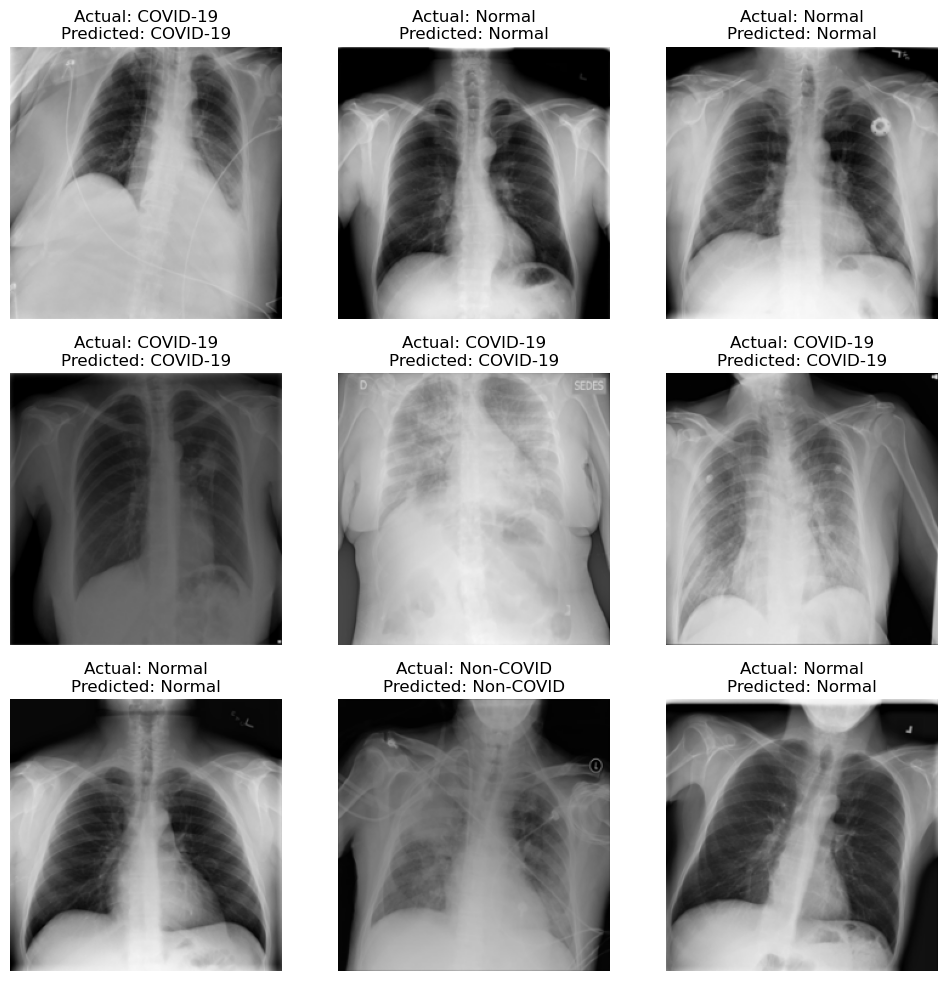

In [ ]:
# Display sample predictions to visualize model performance on individual images
# Shows first 9 images from a random batch to check prediction accuracy
plt.figure(figsize=(12,12))
for images, labels in test_data.take(1):
    predictions = model.predict(images)

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        actual_label = class_names[labels[i]]
        predicted_label = class_names[np.argmax(predictions[i])]
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')

plt.show()

## Model Performance Summary

**Overall Test Accuracy: 87.2%**

**Per-Class Performance:**
- **COVID-19**: 89.8% accuracy - Excellent detection rate
- **Non-COVID**: 83.6% accuracy - Main challenge area  
- **Normal**: 88.1% accuracy - Strong performance

**Key Insights:**
- Strong COVID-19 detection capability suitable for screening
- Main confusion between Non-COVID and Normal cases
- Low false positive rate for COVID-19 classification
